## Cryptocurrency Cluster

### Data Preparation

In [1]:
# Add dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading the preprocessed crypto dataset
file_path = Path("./Resources/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Find the currencies that are being traded
df_crypto = df_crypto[df_crypto["IsTrading"] == True]
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Drop the IsTrading Column
df_crypto = df_crypto.drop(["IsTrading"], axis='columns')
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Remove all rows that have at least 1 null value
df_crypto = df_crypto.dropna()
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Select currencies that have been mined: TotalCoinsMined > 0
df_crypto = df_crypto[df_crypto["TotalCoinsMined"] > 0]
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Remove CoinName and convert all data to numeric
df_crypto = pd.get_dummies(df_crypto.drop(columns=["CoinName"]))
df_crypto

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(df_crypto)
crypto_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, 23.04343724, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction

In [9]:
# Perform dimensionality reduction with PCA and preserve 90% of the explained variance

# Initialize PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca_df = pd.DataFrame(
    data=crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-1.275526e-15,-1.833800e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,3.200204e-280,3.737220e-18,3.058906e-226
1,-0.286779,-0.135378,-1.912917e-15,-1.777667e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-3.542464e-15,1.134452e-16,-2.159253e-15,-8.763674e-17,-2.855548e-15,-1.992363e-15,4.096823e-15,4.734389e-16,-1.535263e-14,-2.319935e-15
2,0.361159,-0.003304,-1.452942e-15,-2.228797e-15,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,1.078515e-14,-6.024140e-15,-2.749693e-16,5.169520e-16,1.547104e-15,-7.953877e-16,-7.504729e-16,2.514686e-15,4.964095e-15,-2.096455e-15
3,-0.287881,-0.256431,-6.811848e-15,-3.112427e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-9.806192e-01,-1.494786e+00,-3.431257e-02,2.412634e+00,-2.327654e+00,2.548621e+00,1.066722e+00,-1.884046e-01,-6.610412e-01,-2.706694e+00
4,-0.136884,-0.256819,-6.263482e-15,-3.622944e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-5.418295e-01,-5.681842e-01,3.455082e-02,6.131959e-03,-1.402705e+00,-3.837129e-02,-4.358995e-01,-3.138682e-02,7.110308e-02,3.630072e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.986464,-0.234495,-6.961525e-15,-4.842536e-14,-1.054757,-0.022428,0.022512,-0.350649,1.203274,0.152063,...,8.049904e-15,3.716572e-14,-5.646947e-15,-1.233518e-14,-3.368144e-14,-2.875538e-14,-3.892789e-14,2.330868e-14,-2.507084e-14,3.276030e-14
528,-0.311155,-0.186258,-2.909235e-15,-2.422405e-14,0.022867,0.849673,-0.274454,0.163274,-1.779116,-0.495436,...,-6.781876e-01,2.985242e-01,-8.523565e-02,3.094446e+00,7.956277e-01,1.576775e+00,6.842649e-01,1.431816e+00,-1.189477e+00,6.281193e-01
529,-0.076558,-0.359258,-7.896527e-16,-4.492445e-14,-0.077205,-3.531071,0.473749,0.020852,0.383523,0.177536,...,1.531885e-14,9.261394e-16,1.001232e-15,4.805913e-16,-5.206405e-16,8.910963e-16,7.609362e-15,1.882316e-15,9.762010e-15,2.262784e-15
530,-0.333347,-0.283921,5.245794e-15,-3.904795e-14,0.011813,-2.475848,0.283016,-0.068158,0.528642,0.314484,...,-1.070638e+00,-1.087583e+00,7.724467e-01,2.440525e-01,9.485891e-01,-1.388672e+00,-1.768250e+00,1.680343e+00,-3.696478e-01,8.650785e-01


#### How did the number of features change?
After using PCA, the number of features was reduced to 441 from 909.

In [11]:
# Reduce the dataset dimensions with t-SNE by running t-SNE on the principal components: the output of 
## the PCA transformation. Create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

In [12]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

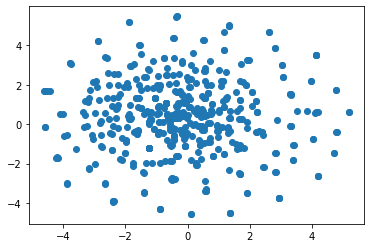

In [13]:
# Plot the scatter plot
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()